In [1]:
from sys import path
import os
path.append(os.path.realpath('../'))

In [2]:
# Celda de prueba en Jupyter
import pandas as pd
import numpy as np
print("✅ Entorno configurado correctamente!")
pd.__version__, np.__version__

✅ Entorno configurado correctamente!


('2.2.3', '2.2.5')

In [3]:
# Ahora intenta importar el módulo
from src.data_fetcher import fetch_and_save_data
from IPython.display import display
# Llamar a la función para obtener los datos
data = fetch_and_save_data()
# Ver los primeros registros
display(data.head())

2025-07-01 16:54:41,508 - DataFetcher - INFO - DataFetcher inicializado para BTCUSDT/1h
2025-07-01 16:54:41,512 - DataFetcher - INFO - Descargando datos con paginación para el rango: 2024-01-01 - 2024-07-01
2025-07-01 16:54:47,244 - DataFetcher - INFO - Datos descargados exitosamente. Registros: 0


,timestamp,open,high,low,close,volume
datetime,,,,,,


In [58]:
import pandas as pd
# Cargar el archivo Parquet
data_local = pd.read_parquet(r'..\data\raw\BTCUSDT_1h_20240101_20240701.parquet')

In [59]:

# Convertir la columna 'timestamp' a un formato datetime
data_local['datetime'] = pd.to_datetime(data_local['timestamp'], unit='ms', utc=True)
# Establecer 'datetime' como índice
data_local.set_index('datetime', inplace=True)
# Asegurarse de que las columnas sean numéricas (float)
data_local[['open', 'high', 'low', 'close', 'volume']] = data_local[['open', 'high', 'low', 'close', 'volume']].apply(pd.to_numeric, errors='coerce')
# Redondear las columnas 'open', 'high', 'low', 'close', 'volume' a dos decimales
data_local[['open', 'high', 'low', 'close', 'volume']] = data_local[['open', 'high', 'low', 'close', 'volume']].round(2)
# Mostrar los primeros registros de forma más clara
display(data_local[['open', 'high', 'low', 'close', 'volume']].head())

,open,high,low,close,volume
datetime,,,,,
2024-01-01 05:00:00+00:00,42399.98,42406.00,42180.77,42234.01,736.53
2024-01-01 06:00:00+00:00,42234.01,42424.82,42208.68,42396.69,601.37
2024-01-01 07:00:00+00:00,42396.69,42500.00,42396.68,42492.46,653.68
2024-01-01 08:00:00+00:00,42492.46,42556.50,42452.58,42549.99,427.19
2024-01-01 09:00:00+00:00,42550.00,42699.32,42537.18,42649.69,879.62


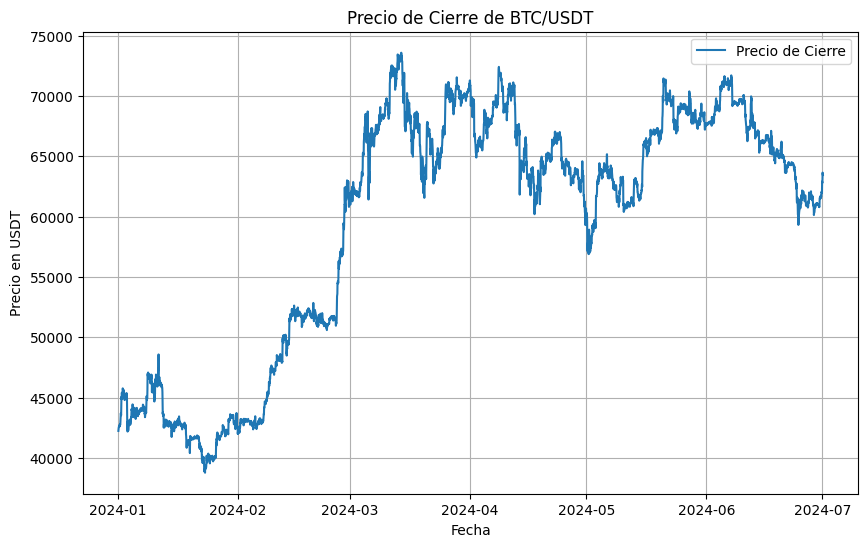

In [53]:
import matplotlib.pyplot as plt

# Graficar los precios de cierre
plt.figure(figsize=(10, 6))
plt.plot(data_local.index, data_local['close'], label='Precio de Cierre')
plt.title('Precio de Cierre de BTC/USDT')
plt.xlabel('Fecha')
plt.ylabel('Precio en USDT')
plt.legend()
plt.grid(True)
plt.show()